Make plots for transcriptome wide detection and detection sensitivity.

In [1]:
import sys,os
path = '/nfs/team283/aa16/KR_NAS/'
os.chdir(path)
sys.path.append(path)
%pylab inline
import pandas as pd
import pickle as pickle
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import isctools
data_type = 'float32'
os.environ["THEANO_FLAGS"] = 'device=cuda,floatX=' + data_type + ',force_device=True' + ',dnn.enabled=False'

Populating the interactive namespace from numpy and matplotlib


/nfs/users/nfs_a/aa16/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


Load data:

In [2]:
adata = pickle.load(open('../KR_NAS/data/nanostringWTA_fetailBrain_AnnData.p',  "rb"))
adata = adata[:,adata.var_names != 'NegProbe-WTX']

In [3]:
adata.obs['GeoLOD2.0_01'] = adata.obs['NegGeoMean_01'] * adata.obs['NegGeoSD_01']**2

Trying to set attribute `.obs` of view, copying.


Add number of detected genes to adata object:

In [4]:
adata.obs['DetectedGenes2.5'] = np.sum(np.array([adata.X[i,:] >= adata.obs['GeoLOD2.5_01'].iloc[i] for i in range(len(adata.X[:,1]))]), axis = 1)
adata.obs['DetectedGenes2.0'] = np.sum(np.array([adata.X[i,:] >= adata.obs['GeoLOD2.0_01'].iloc[i] for i in range(len(adata.X[:,1]))]), axis = 1)

Also add number of detected vRG and IP markers to adata object:

In [5]:
markers = pd.read_csv('../data/fetalBrain/Polioudakis/clusterMarkers.csv')
vRG_markers = np.array(markers['gene'].loc[[markers['p_val'][i] < 0.01
                      and markers['cluster'][i] == 'vRG' for i in range(len(markers['cluster']))]])
vRG_index = [np.where(adata.var_names == g)[0][0] for g in vRG_markers if g in adata.var_names]

IP_markers = np.array(markers['gene'].loc[[markers['p_val'][i] < 0.01
                           and markers['cluster'][i] == 'IP' for i in range(len(markers['cluster']))]])
IP_index = [np.where(adata.var_names == g)[0][0] for g in IP_markers if g in adata.var_names]

InMGE_markers = np.array(markers['gene'].loc[[markers['p_val'][i] < 0.01
                           and markers['cluster'][i] == 'InMGE' for i in range(len(markers['cluster']))]])
InMGE_index = [np.where(adata.var_names == g)[0][0] for g in InMGE_markers if g in adata.var_names]

InCGE_markers = np.array(markers['gene'].loc[[markers['p_val'][i] < 0.01
                           and markers['cluster'][i] == 'InCGE' for i in range(len(markers['cluster']))]])
InCGE_index = [np.where(adata.var_names == g)[0][0] for g in InCGE_markers if g in adata.var_names]

In [6]:
adata.obs['DetectedGenes2.5_vRG'] = np.sum(np.array([adata.X[i,vRG_index] >= adata.obs['GeoLOD2.5_01'].iloc[i] for i in range(len(adata.X[:,1]))]), axis = 1)
adata.obs['DetectedGenes2.5_IP'] = np.sum(np.array([adata.X[i,IP_index] >= adata.obs['GeoLOD2.5_01'].iloc[i] for i in range(len(adata.X[:,1]))]), axis = 1)
adata.obs['DetectedGenes2.5_InMGE'] = np.sum(np.array([adata.X[i,InMGE_index] >= adata.obs['GeoLOD2.5_01'].iloc[i] for i in range(len(adata.X[:,1]))]), axis = 1)
adata.obs['DetectedGenes2.5_InCGE'] = np.sum(np.array([adata.X[i,InCGE_index] >= adata.obs['GeoLOD2.5_01'].iloc[i] for i in range(len(adata.X[:,1]))]), axis = 1)

adata.obs['DetectedGenes2.0_vRG'] = np.sum(np.array([adata.X[i,vRG_index] >= adata.obs['GeoLOD2.0_01'].iloc[i] for i in range(len(adata.X[:,1]))]), axis = 1)
adata.obs['DetectedGenes2.0_IP'] = np.sum(np.array([adata.X[i,IP_index] >= adata.obs['GeoLOD2.0_01'].iloc[i] for i in range(len(adata.X[:,1]))]), axis = 1)
adata.obs['DetectedGenes2.0_InMGE'] = np.sum(np.array([adata.X[i,InMGE_index] >= adata.obs['GeoLOD2.0_01'].iloc[i] for i in range(len(adata.X[:,1]))]), axis = 1)
adata.obs['DetectedGenes2.0_InCGE'] = np.sum(np.array([adata.X[i,InCGE_index] >= adata.obs['GeoLOD2.0_01'].iloc[i] for i in range(len(adata.X[:,1]))]), axis = 1)

Plot number of detected genes across all GeometricROIs:

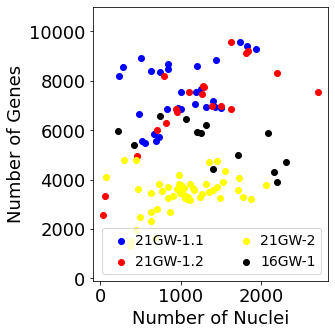

In [7]:
SMALL_SIZE = 18
MEDIUM_SIZE = 18
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)            # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

roi_number = adata.obs['nuclei']
detected_genes = adata.obs['DetectedGenes2.0']

slide1_subset = [adata.obs['AOI_type'][i] == 'Geometric' and adata.obs['Radial_position'][i] in (2,5)
                 and adata.obs['slide'][i] == '00MU' for i in range(len(adata.obs['AOI_type']))]
slide2_subset = [adata.obs['AOI_type'][i] == 'Geometric' and adata.obs['Radial_position'][i] in (2,5) 
                 and adata.obs['slide'][i] in ('00MV', '00MV-2') for i in range(len(adata.obs['AOI_type']))]
slide3_subset = [adata.obs['AOI_type'][i] == 'Geometric' and adata.obs['slide'][i] == '00MR' for i in range(len(adata.obs['AOI_type']))]
slide4_subset = [adata.obs['AOI_type'][i] == 'Geometric' and adata.obs['Radial_position'][i] in (2,5)
                 and adata.obs['slide'][i] == '00MW' for i in range(len(adata.obs['AOI_type']))]

plt.figure(figsize=(5,5))
plt.scatter(roi_number[slide1_subset], detected_genes[slide1_subset], label = '21GW-1.1', c = 'blue')
plt.scatter(roi_number[slide2_subset], detected_genes[slide2_subset], label = '21GW-1.2', c = 'red')
plt.scatter(roi_number[slide3_subset], detected_genes[slide3_subset], label = '21GW-2', c = 'yellow')
plt.scatter(roi_number[slide4_subset], detected_genes[slide4_subset], label = '16GW-1', c = 'black')
plt.xlabel('Number of Nuclei')
plt.ylabel('Number of Genes')
plt.ylim(-100,11000)
plt.legend(ncol = 2, loc = 'lower right', handletextpad=0)
plt.tight_layout()
plt.savefig('0_publication_figures/Figure1_TranscriptomeWideDetection_xAxisNuclei_SquareFormat_LoD2_Draft2.pdf', bbox_tight = True)

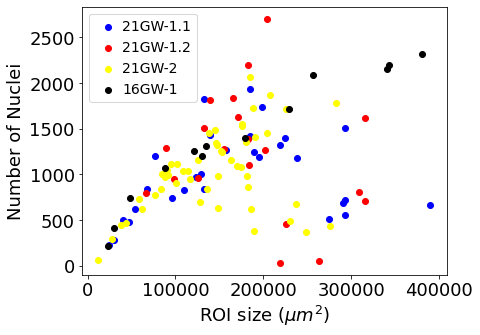

In [9]:
SMALL_SIZE = 18
MEDIUM_SIZE = 18
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)            # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

roi_number = adata.obs['nuclei']
detected_genes = adata.obs['roi_dimension'].iloc[:,0]

slide1_subset = [adata.obs['AOI_type'][i] == 'Geometric' and adata.obs['Radial_position'][i] in (2,5)
                 and adata.obs['slide'][i] == '00MU' for i in range(len(adata.obs['AOI_type']))]
slide2_subset = [adata.obs['AOI_type'][i] == 'Geometric' and adata.obs['Radial_position'][i] in (2,5) 
                 and adata.obs['slide'][i] in ('00MV', '00MV-2') for i in range(len(adata.obs['AOI_type']))]
slide3_subset = [adata.obs['AOI_type'][i] == 'Geometric' and adata.obs['slide'][i] == '00MR' for i in range(len(adata.obs['AOI_type']))]
slide4_subset = [adata.obs['AOI_type'][i] == 'Geometric' and adata.obs['Radial_position'][i] in (2,5)
                 and adata.obs['slide'][i] == '00MW' for i in range(len(adata.obs['AOI_type']))]

plt.figure(figsize=(7,5))
plt.scatter(detected_genes[slide1_subset], roi_number[slide1_subset],  label = '21GW-1.1', c = 'blue')
plt.scatter( detected_genes[slide2_subset], roi_number[slide2_subset], label = '21GW-1.2', c = 'red')
plt.scatter(detected_genes[slide3_subset], roi_number[slide3_subset],  label = '21GW-2', c = 'yellow')
plt.scatter(detected_genes[slide4_subset], roi_number[slide4_subset], label = '16GW-1', c = 'black')
plt.ylabel('Number of Nuclei')
plt.xlabel('ROI size (' + "$\mu m^2$" + ')')
#plt.ylim(-100,11000)
plt.legend(ncol = 1, loc = 'upper left', handletextpad=0)
plt.tight_layout()
plt.savefig('0_publication_figures/Supplementary_ROIsize_vs_nucleiNumber.pdf', bbox_tight = True)

In [38]:
np.max(detected_genes[slide1_subset])

390059.1538

In [15]:
np.max(np.array(detected_genes))

390059.1538

In [26]:
np.max(roi_number[slide2_subset])

2702

In [17]:
np.max(roi_number)

2890

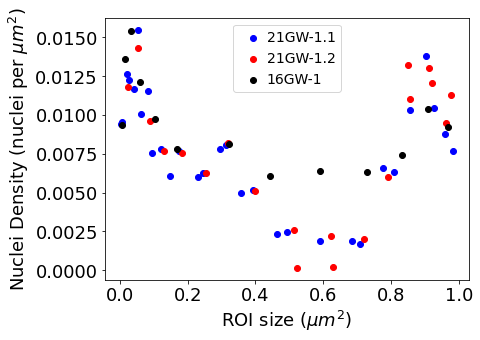

In [29]:
SMALL_SIZE = 18
MEDIUM_SIZE = 18
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)            # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

roi_number = adata.obs['nuclei']/adata.obs['roi_dimension'].iloc[:,0]
detected_genes = adata.obs['VCDepth']

slide1_subset = [adata.obs['AOI_type'][i] == 'Geometric' and adata.obs['Radial_position'][i] in (2,5)
                 and adata.obs['slide'][i] == '00MU' for i in range(len(adata.obs['AOI_type']))]
slide2_subset = [adata.obs['AOI_type'][i] == 'Geometric' and adata.obs['Radial_position'][i] in (2,5) 
                 and adata.obs['slide'][i] in ('00MV', '00MV-2') for i in range(len(adata.obs['AOI_type']))]
slide3_subset = [adata.obs['AOI_type'][i] == 'Geometric' and adata.obs['slide'][i] == '00MR' for i in range(len(adata.obs['AOI_type']))]
slide4_subset = [adata.obs['AOI_type'][i] == 'Geometric' and adata.obs['Radial_position'][i] in (2,5)
                 and adata.obs['slide'][i] == '00MW' for i in range(len(adata.obs['AOI_type']))]

plt.figure(figsize=(7,5))
plt.scatter(detected_genes[slide1_subset], roi_number[slide1_subset],  label = '21GW-1.1', c = 'blue')
plt.scatter( detected_genes[slide2_subset], roi_number[slide2_subset], label = '21GW-1.2', c = 'red')
plt.scatter(detected_genes[slide4_subset], roi_number[slide4_subset], label = '16GW-1', c = 'black')
plt.ylabel('Nuclei Density (nuclei per ' + "$\mu m^2$" + ')')
plt.xlabel('ROI size (' + "$\mu m^2$" + ')')
#plt.ylim(-100,11000)
plt.legend(ncol = 1, loc = 'upper center', handletextpad=0)
plt.tight_layout()
plt.savefig('0_publication_figures/Supplementary_CorticalDepth_vs_nucleiDensity.pdf', bbox_tight = True)

In [8]:
pd.set_option('display.expand_frame_repr', False)
test = adata.obs.sort_values('nuclei')
test = test.loc[[test['Radial_position'][i] in (2,5) and test['slide'][i] in ('00MV', '00MV-2') 
          for i in range(len(test['Radial_position']))]]

In [9]:
print(test['VCDepth'])
print(test['Radial_position'])

HCA_F_BRA8739359    0.521105
HCA_F_BRA8739351    0.629048
HCA_F_BRA8739216    0.720293
HCA_F_BRA8739200    0.621572
HCA_F_BRA8739231    0.023035
HCA_F_BRA8739208    0.513711
HCA_F_BRA8739247    0.087751
HCA_F_BRA8739255    0.129799
HCA_F_BRA8739224    0.789762
HCA_F_BRA8739271    0.253382
HCA_F_BRA8739184    0.319196
HCA_F_BRA8739239    0.053748
HCA_F_BRA8739263    0.182815
HCA_F_BRA8739319    0.977071
HCA_F_BRA8739192    0.398537
HCA_F_BRA8739248    0.963437
HCA_F_BRA8739240    0.910420
HCA_F_BRA8739232    0.855576
HCA_F_BRA8739327    0.921239
HCA_F_BRA8739335    0.848656
Name: VCDepth, dtype: float64
HCA_F_BRA8739359    5.0
HCA_F_BRA8739351    5.0
HCA_F_BRA8739216    2.0
HCA_F_BRA8739200    2.0
HCA_F_BRA8739231    2.0
HCA_F_BRA8739208    2.0
HCA_F_BRA8739247    2.0
HCA_F_BRA8739255    2.0
HCA_F_BRA8739224    2.0
HCA_F_BRA8739271    2.0
HCA_F_BRA8739184    2.0
HCA_F_BRA8739239    2.0
HCA_F_BRA8739263    2.0
HCA_F_BRA8739319    5.0
HCA_F_BRA8739192    2.0
HCA_F_BRA8739248    2.0
HCA_F_

Plot number of detected Genes for small VZ ROIs:

In [10]:
# Identify small VZ ROIs:
subset = [adata.obs['nuclei'][i] < 150 and adata.obs['slide'][i] == '00MU' and adata.obs['AOI_type'][i] == 'Geometric' for i in
         range(len(adata.obs['nuclei']))]
np.array(adata.obs.loc[:,('AOI_type', 'nuclei','VCDepth')].loc[subset])

array([['Geometric', 95, 0.007499429],
       ['Geometric', 48, 0.007499429],
       ['Geometric', 16, 0.007499429],
       ['Geometric', 5, 0.007499429]], dtype=object)

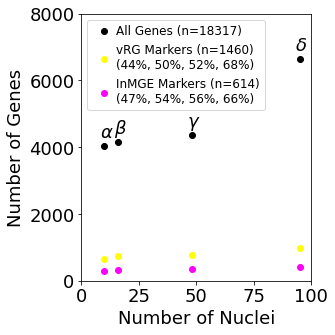

In [11]:
n = 4

SMALL_SIZE = 18
MEDIUM_SIZE = 18
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)            # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

roi_number = np.array((95,48,16,10)) #adata.obs['nuclei']
detected_genes = adata.obs['DetectedGenes2.0']

plt.figure(figsize=(5,5))
plt.scatter(roi_number, detected_genes[subset], label = 'All Genes (n=18317)', c = 'black')
plt.scatter(roi_number, adata.obs['DetectedGenes2.0_vRG'][subset],
            label = 'vRG Markers (n=' + str(len(vRG_markers)) + ')' + '\n' + '(' + 
            ', '.join([str(np.round(adata.obs['DetectedGenes2.0_vRG'][subset]/len(vRG_markers),2)[i]*100)[:2] + '%' for i in (3,2,1,0)]) + ')' ,
            c = 'yellow')
plt.scatter(roi_number, adata.obs['DetectedGenes2.0_InMGE'][subset],
            label = 'InMGE Markers (n=' + str(len(InMGE_markers)) + ')'+ '\n' + '(' + 
            ', '.join([str(np.round(adata.obs['DetectedGenes2.0_InMGE'][subset]/len(InMGE_markers),2)[i]*100)[:2] + '%' for i in (3,2,1,0)]) + ')' ,
            c = 'magenta')
plt.xlabel('Number of Nuclei')
plt.ylabel('Number of Genes')
plt.ylim(0,8000)
plt.xlim(0,100)
plt.legend(ncol = 1, handletextpad=0)

text = (r'$\delta$', r'$\gamma$', r'$\beta$', r'$\alpha$')
for i, txt in enumerate(text):
    ax = gca()
    ax.annotate(txt, (roi_number[i]-2, detected_genes[subset][i]+250))
plt.tight_layout()
plt.savefig('0_publication_figures/Figure1_DetectionSensitivity_4VZROIs_LoD20_Draft3.pdf')

In [12]:
roi_number

array([95, 48, 16, 10])

Check how many vRG genes detected in scRNAseq are also detected in WTA data (possibly include a correlation figure)

In [13]:
meanExpression_sc = pd.read_csv('data/polioudakis2019_meanExpressionProfiles.csv')
commonGenes = [g for g in meanExpression_sc['Unnamed: 0'] if g in adata.var_names]
meanExpression_sc = meanExpression_sc.loc[[g in commonGenes for g in meanExpression_sc['Unnamed: 0']]]
adata = adata[:,[g in commonGenes for g in adata.var_names]]

In [14]:
vRG_scRNAseq = np.sum(meanExpression_sc['vRG'] >= 0.02)
vRG_WTA = np.sum(np.sum(np.array([adata.X[i,:] >= adata.obs['GeoLOD2.0_01'].iloc[i] 
                           for i in np.where(subset)[0]]), axis = 0) > 0)
print(vRG_scRNAseq)
print(vRG_WTA)

8731
7320


total # of genes detected in nanostring across all 21GW ROIs (in one replicate) vs scRNAseq

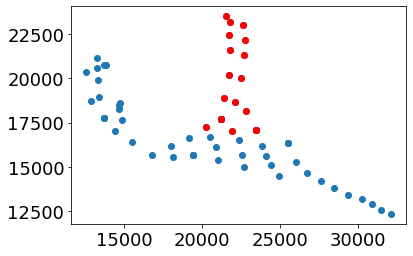

In [54]:
subset1 = [adata.obs['slide'].iloc[i] == '00MR'
           and adata.obs['Y_coordinate'].iloc[i] > 17000
           and adata.obs['X_coordinate'].iloc[i] > 20000
           for i in range(len(adata.obs['slide']))]
plt.scatter(adata.obs['X_coordinate'], adata.obs['Y_coordinate'])
plt.scatter(adata.obs['X_coordinate'].loc[subset1], adata.obs['Y_coordinate'].loc[subset1], c = 'red')

In [55]:
subset2 = [adata.obs['slide'].iloc[i] in ('00MV', '00MV-2', '00MU')
          and adata.obs['AOI_type'].iloc[i] == 'Geometric'
          for i in range(len(adata.obs['slide']))]

In [59]:
subset2

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 Fal

In [66]:
all_scRNAseq = np.array(meanExpression_sc['Unnamed: 0'].loc[np.sum(meanExpression_sc.iloc[:,1:17] >= 0.02, axis = 1) > 0])

geometricROIs_21GW = np.where([subset1[i] or subset2[i] for i in range(len(subset1))])[0]

all_WTA = adata.var_names[np.sum(np.array([adata.X[i,:] >= adata.obs['GeoLOD2.0_01'].iloc[i] 
                           for i in geometricROIs_21GW]), axis = 0) > 2]

unique_scRNAseq = [g for g in all_scRNAseq if g not in all_WTA]
unique_WTA = [g for g in all_WTA if g not in all_scRNAseq]

common = [g for g in all_scRNAseq if g in all_WTA]

In [67]:
print(len(unique_scRNAseq))
print(len(unique_WTA))
print(len(common))

2288
820
9932


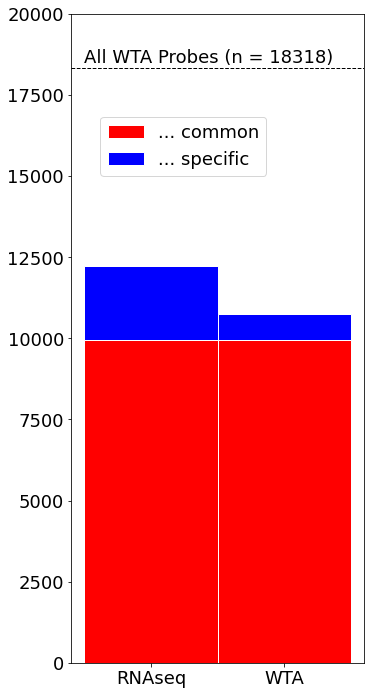

In [68]:
SMALL_SIZE = 18
MEDIUM_SIZE = 18
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)            # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
 
# Values of each group
bars1 = [len(common), len(common)]
bars2 = [len(unique_scRNAseq), len(unique_WTA)]

# The position of the bars on the x-axis
r = [0,1]
 
# Names of group and bar width
names = ['RNAseq', 'WTA']
barWidth = 1

plt.figure(figsize=(5.5,10))
# Create brown bars
plt.bar(r, bars1, color= 'red', edgecolor='white', width=barWidth, label = '... common')
# Create green bars (top)
plt.bar(r, bars2, bottom=bars1, color='blue', edgecolor='white', width=barWidth, label = '... specific')

plt.axhline(y=18317,linewidth=1, color='k', linestyle= '--')
plt.text(-0.5,18500, 'All WTA Probes (n = 18318)')

plt.ylim(0,20000)

# Custom X axis
plt.xticks(r, names)

plt.legend(loc = (0.1,0.75))

plt.tight_layout()
plt.savefig('../KR_NAS/0_publication_figures/Figure1_TotalNumberGenesDetected_scRNAseq-vs-WTA_Draft2.pdf')

# Show graphic
plt.show()

In [32]:
all_scRNAseq = np.array(meanExpression_sc['Unnamed: 0'].loc[np.sum(meanExpression_sc.iloc[:,1:17] >= 0.02, axis = 1) > 0])

geometricROIs_21GW = np.where([adata.obs['slide'].iloc[i] in ('00MV', '00MV-2', '00MU')
#           and adata.obs['AOI_type'].iloc[i] == 'Geometric'
#           and adata.obs['Radial_position'].iloc[i] == 2
          for i in range(len(adata.obs['slide']))])[0]

all_WTA = adata.var_names[np.sum(np.array([adata.X[i,:] >= adata.obs['GeoLOD2.5_01'].iloc[i] 
                           for i in np.where(geometricROIs_21GW)[0]]), axis = 0) > 2]

unique_scRNAseq = [g for g in all_scRNAseq if g not in all_WTA]
unique_WTA = [g for g in all_WTA if g not in all_scRNAseq]

common = [g for g in all_scRNAseq if g in all_WTA]

In [33]:
print(len(all_WTA))
print(len(all_scRNAseq))
print(len(unique_WTA))
print(len(unique_scRNAseq))
print(len(common))

11414
12220
992
1798
10422
